# Environment

In [1]:
import pandas as pd
import numpy as np
import ddfloww as dd
import scipy as sp
import scipy.stats as stats
import xgboost as xgb
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.feature_selection import f_regression
from sci_analysis import analyze


# Acquisition

Created four dataframes of properties and predictions (2016 & 2017). Joined them into a single dataframe which was exported to a csv file in order to facilitate working locally on a single machine. The previous operations ran once and then commented out. The function below reads in the saved `zillow.csv` file.

In [2]:
df = dd.get_zillow()

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


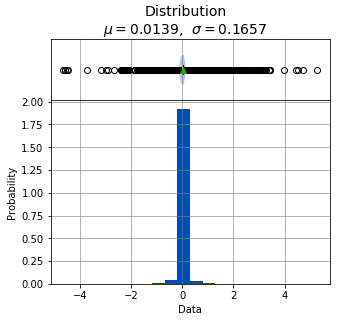



Statistics
----------

n         =  167888
Mean      =  0.0139
Std Dev   =  0.1657
Std Error =  0.0004
Skewness  =  2.9508
Kurtosis  =  121.3859
Maximum   =  5.2630
75%       =  0.0392
50%       =  0.0060
25%       = -0.0253
Minimum   = -4.6554
IQR       =  0.0645
Range     =  9.9184


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.5131
p value =  0.0000

HA: Data is not normally distributed



In [3]:
analyze(df.logerror)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


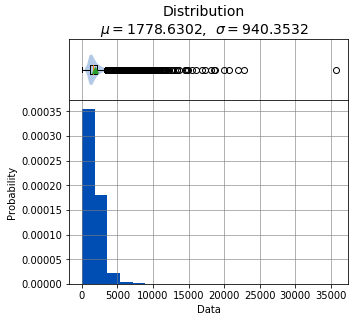



Statistics
----------

n         =  166992
Mean      =  1778.6302
Std Dev   =  940.3532
Std Error =  2.3011
Skewness  =  3.0250
Kurtosis  =  28.8169
Maximum   =  35640.0000
75%       =  2103.0000
50%       =  1541.0000
25%       =  1183.0000
Minimum   =  2.0000
IQR       =  920.0000
Range     =  35638.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8022
p value =  0.0000

HA: Data is not normally distributed



In [4]:
analyze(df.calculatedfinishedsquarefeet)

# Preparation

In [5]:
# Plot styling
plt.style.use('fivethirtyeight')

Let's take a peek at the dataframe and summarize.

In [6]:
dd.summarize_data(df)
df.shape

HEAD
   parcelid  logerror transactiondate       id  airconditioningtypeid  \
0  11016594    0.0276      2016-01-01  2931667                    1.0   
1  14366692   -0.1684      2016-01-01   475764                    NaN   
2  12098116   -0.0040      2016-01-01  2444575                    1.0   
3  12643413    0.0218      2016-01-02  1584730                    1.0   
4  14432541   -0.0050      2016-01-02  2926916                    NaN   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          2.0         3.0   
1                       NaN           NaN          3.5         4.0   
2                       NaN           NaN          3.0         2.0   
3                       NaN           NaN          2.0         2.0   
4                       NaN           NaN          2.5         4.0   

   buildingclasstypeid         ...           taxdelinquencyflag  \
0                  NaN         ...                          NaN   
1

(10554760.42, 26409495.9]     167841
(26409495.9, 42107253.8]           0
(42107253.8, 57805011.7]           0
(57805011.7, 73502769.6]           0
(73502769.6, 89200527.5]           1
(89200527.5, 104898285.4]          4
(104898285.4, 120596043.3]         0
(120596043.3, 136293801.2]         0
(136293801.2, 151991559.1]         0
(151991559.1, 167689317.0]        42
Name: parcelid, dtype: int64


logerror:
(-4.666, -3.664]         6
(-3.664, -2.672]         4
(-2.672, -1.68]         83
(-1.68, -0.688]        364
(-0.688, 0.304]     163696
(0.304, 1.296]        3417
(1.296, 2.287]         197
(2.287, 3.279]         111
(3.279, 4.271]           6
(4.271, 5.263]           4
Name: logerror, dtype: int64


transactiondate:
2017-06-30    1195
2017-04-28     917
2016-07-29     910
2016-04-29     902
2016-09-30     894
2016-06-30     874
2017-05-31     868
2016-05-27     863
2017-07-28     815
2017-08-31     782
2017-03-31     772
2017-05-26     746
2016-08-31     737
2016-07-01     731
2017-

propertycountylandusecode:
0100    57628
122     28450
010C    19102
0101    13848
34      10878
1111     7245
1        5314
010E     4339
010D     4155
0200     4000
1129     3023
1110     2142
0400     1369
0300     1063
012C      908
0104      717
1128      691
01DC      463
01HC      285
010V      245
38        200
96        195
0103      191
010G      174
010H      136
010M      112
0700      104
0108      103
1117      102
1210       89
        ...  
0130        3
0105        3
1120        3
0111        3
1722        3
0301        3
020M        2
1011        2
0131        2
1012        2
0114        2
040G        1
0115        1
1420        1
0303        1
0210        1
1200        1
0204        1
0           1
01DD        1
040B        1
040A        1
6050        1
8800        1
0133        1
020E        1
010         1
0203        1
200         1
010L        1
Name: propertycountylandusecode, Length: 91, dtype: int64


propertylandusetypeid:
(30.755, 55.4]        33
(55.4, 79.8

(167888, 68)

Aggressively reduce number of column variables:

1. Columns and (subsequently) rows were removed if their number of missing values exceeds the threshold of 50% for columns and 75% for rows.
1. Columns that are redundant or add no value were also removed.
1. Certain rows were removed if the given columns' values are null.
1. Estimated single-unit dwellings were estimated and filtered in.

In [7]:
df = dd.prep_zillow(df,
                    preq_col=.5,
                    preq_row=.6,
                    cols_to_remove=['parcelid',
                                    'id',
                                    'finishedsquarefeet12',
                                    'fips',
                                    'heatingorsystemtypeid',
                                    'propertylandusetypeid',
                                    'rawcensustractandblock',
                                    'regionidcity',
                                    'roomcnt',
                                    'assessmentyear',
                                    'censustractandblock',
                                    'structuretaxvaluedollarcnt',
                                    'taxvaluedollarcnt',
                                    'propertycountylandusecode',
                                    'propertycountylandusecode',
                                    'propertylandusetypeid',
                                    'propertyzoningdesc',],
                    cols_to_validate=['latitude', 'longitude'])

Impute the values in land square feet using linear regression with landtaxvaluedollarcnt as x and estimated land square feet as y.

In [8]:
# Take the absolute value of log errors
df.logerror = df.logerror.abs()
df.logerror.sample(10)

94190     0.167580
90681     0.009819
95683     0.148924
83367     0.076000
101088    0.000726
101192    0.025567
158884    0.085226
13194     0.034400
81430     0.216900
115780    0.097080
Name: logerror, dtype: float64

In [9]:
df = dd.impute_missing(df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[32683.87758287]
[[-0.01046837]]
Univariate - final_exam = b + m * exam1
    y-intercept (b): 32683.88
    coefficient (m): -0.01



In [10]:
dd.missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
logerror,0,0.000000,0,0.0,0,0.0
transactiondate,0,0.000000,0,0.0,0,0.0
bathroomcnt,0,0.000000,0,0.0,0,0.0
bedroomcnt,0,0.000000,0,0.0,0,0.0
buildingqualitytypeid,56590,34.809620,0,0.0,0,0.0
calculatedbathnbr,112,0.068893,0,0.0,0,0.0
calculatedfinishedsquarefeet,26,0.015993,0,0.0,0,0.0
fullbathcnt,112,0.068893,0,0.0,0,0.0
latitude,0,0.000000,0,0.0,0,0.0
longitude,0,0.000000,0,0.0,0,0.0


In [11]:
df = dd.fill_with_median(df, ['buildingqualitytypeid', 'unitcnt', 'yearbuilt'])

In [12]:
df = dd.fill_with_none(df, 'heatingorsystemdesc')

In [13]:
dd.missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
logerror,0,0.000000,0,0.0,0,0.0
transactiondate,0,0.000000,0,0.0,0,0.0
bathroomcnt,0,0.000000,0,0.0,0,0.0
bedroomcnt,0,0.000000,0,0.0,0,0.0
buildingqualitytypeid,0,0.000000,0,0.0,0,0.0
calculatedbathnbr,112,0.068893,0,0.0,0,0.0
calculatedfinishedsquarefeet,26,0.015993,0,0.0,0,0.0
fullbathcnt,112,0.068893,0,0.0,0,0.0
latitude,0,0.000000,0,0.0,0,0.0
longitude,0,0.000000,0,0.0,0,0.0


In [14]:
dd.missing_values_row(df)

,num_missing,percentage
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


Let's check data types.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162570 entries, 0 to 167887
Data columns (total 19 columns):
logerror                        162570 non-null float64
transactiondate                 162570 non-null object
bathroomcnt                     162570 non-null float64
bedroomcnt                      162570 non-null float64
buildingqualitytypeid           162570 non-null float64
calculatedbathnbr               162458 non-null float64
calculatedfinishedsquarefeet    162544 non-null float64
fullbathcnt                     162458 non-null float64
latitude                        162570 non-null float64
longitude                       162570 non-null float64
lotsizesquarefeet               162570 non-null float64
regionidcounty                  162570 non-null float64
regionidzip                     162512 non-null float64
unitcnt                         162570 non-null float64
yearbuilt                       162570 non-null float64
landtaxvaluedollarcnt           162568 non-null fl

Convert column variables into their proper data type.

In [16]:
df = dd.convert_to_string(df,
                          'buildingqualitytypeid',
                          'regionidcounty',
                          'regionidzip',)

In [17]:
df = dd.convert_to_int(df, 'yearbuilt')

Check colummn variables for the correct data type after `astype()` conversions.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162570 entries, 0 to 167887
Data columns (total 19 columns):
logerror                        162570 non-null float64
transactiondate                 162570 non-null object
bathroomcnt                     162570 non-null float64
bedroomcnt                      162570 non-null float64
buildingqualitytypeid           162570 non-null object
calculatedbathnbr               162458 non-null float64
calculatedfinishedsquarefeet    162544 non-null float64
fullbathcnt                     162458 non-null float64
latitude                        162570 non-null float64
longitude                       162570 non-null float64
lotsizesquarefeet               162570 non-null float64
regionidcounty                  162570 non-null object
regionidzip                     162570 non-null object
unitcnt                         162570 non-null float64
yearbuilt                       162570 non-null int64
landtaxvaluedollarcnt           162568 non-null float64

Now, let's check for some outliers.

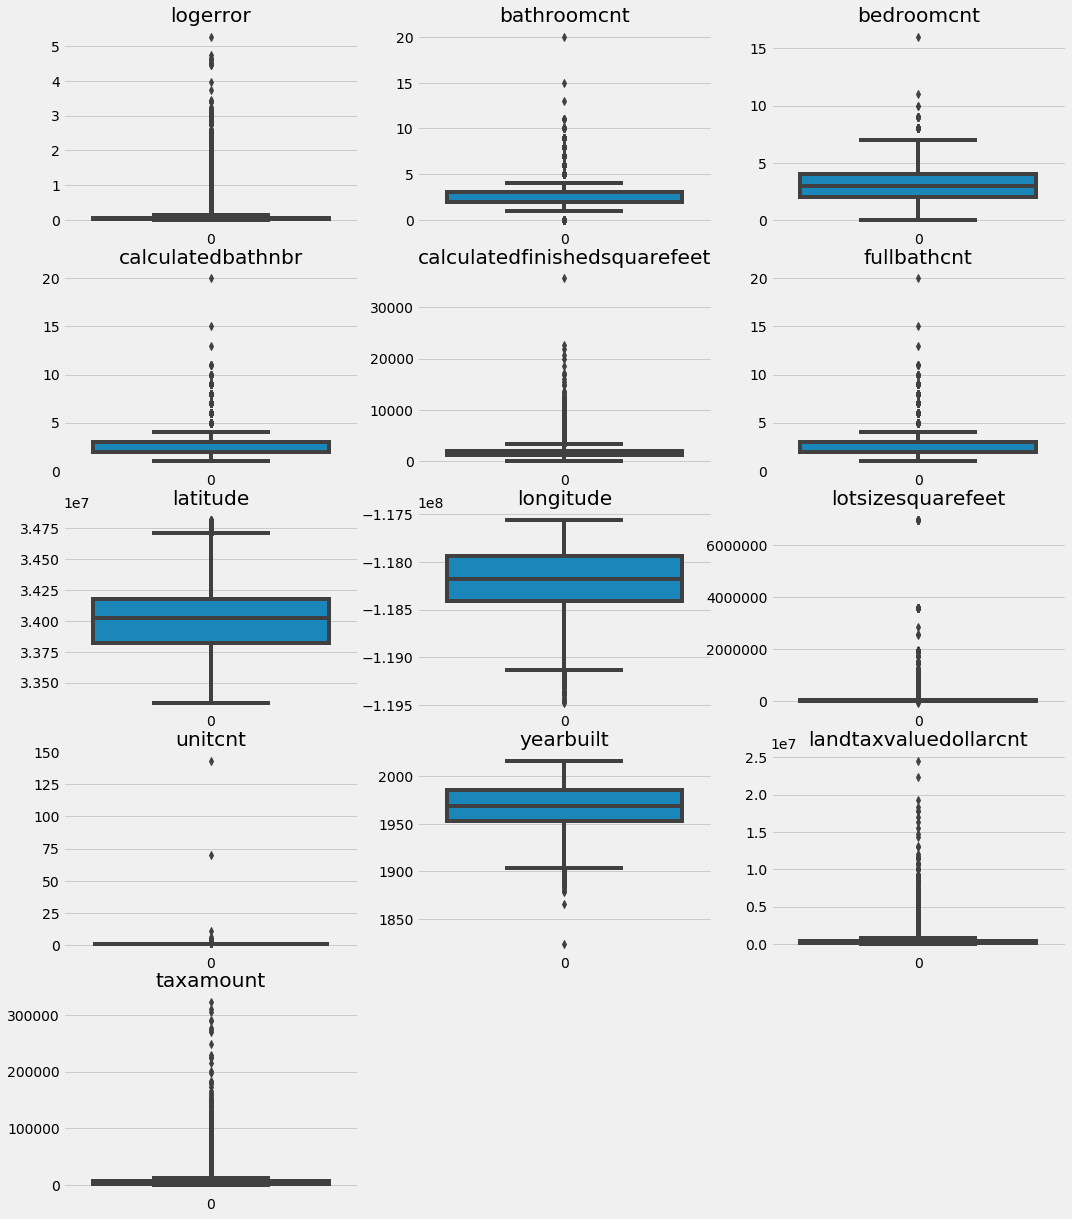

In [ ]:
dd.plot_subs(df,
             df.select_dtypes(include='number').columns.values)

Now, let's remove the outliers.

In [ ]:
# Remove outliers and nonsensical observations
# TODO: do this using function with selectable method.
df = df[df.bathroomcnt <= 15]
df = df[df.bedroomcnt <= 13]
df = df[df.calculatedbathnbr <= 15]
df = df[df.calculatedfinishedsquarefeet <= 14000]
df = df[df.fullbathcnt <= 15]
df = df[df.latitude >= 33500000]
df = df[df.lotsizesquarefeet <= 2000000]
df = df[df.unitcnt <= 1]
df = df[df.landtaxvaluedollarcnt <= 20000000]

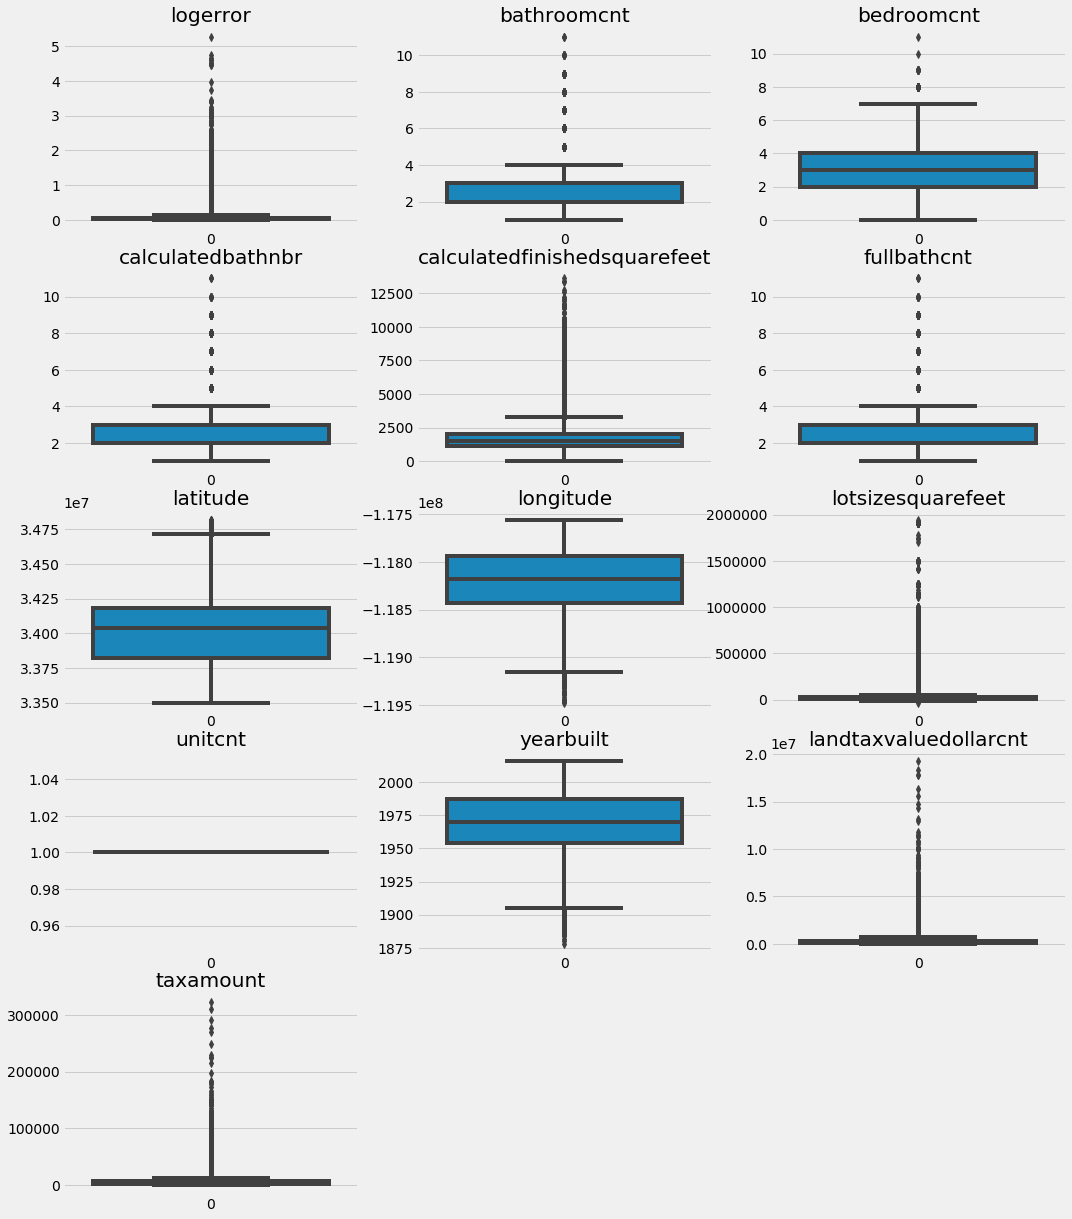

In [ ]:
dd.plot_subs(df,
             df.select_dtypes(include='number').columns.values)

'unitcnt' can now be removed since all observations share the same value.

In [ ]:
df = df.drop(columns='unitcnt')
df.columns

Index(['logerror', 'transactiondate', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'regionidcounty', 'regionidzip', 'yearbuilt',
       'landtaxvaluedollarcnt', 'taxamount', 'propertylandusedesc',
       'heatingorsystemdesc'],
      dtype='object')

In [ ]:
dd.missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
logerror,0,0.00000,0,0.0,0,0.000000
transactiondate,0,0.00000,0,0.0,0,0.000000
bathroomcnt,0,0.00000,0,0.0,0,0.000000
bedroomcnt,0,0.00000,0,0.0,0,0.000000
buildingqualitytypeid,0,0.00000,0,0.0,0,0.000000
calculatedbathnbr,0,0.00000,0,0.0,0,0.000000
calculatedfinishedsquarefeet,0,0.00000,0,0.0,0,0.000000
fullbathcnt,0,0.00000,0,0.0,0,0.000000
latitude,0,0.00000,0,0.0,0,0.000000
longitude,0,0.00000,0,0.0,0,0.000000


In [ ]:
df = dd.validate_cols(df, ['taxamount'])

In [ ]:
dd.missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
logerror,0,0.0,0,0.0,0,0.00000
transactiondate,0,0.0,0,0.0,0,0.00000
bathroomcnt,0,0.0,0,0.0,0,0.00000
bedroomcnt,0,0.0,0,0.0,0,0.00000
buildingqualitytypeid,0,0.0,0,0.0,0,0.00000
calculatedbathnbr,0,0.0,0,0.0,0,0.00000
calculatedfinishedsquarefeet,0,0.0,0,0.0,0,0.00000
fullbathcnt,0,0.0,0,0.0,0,0.00000
latitude,0,0.0,0,0.0,0,0.00000
longitude,0,0.0,0,0.0,0,0.00000


# Exploration

Let's plot the logerror and its distribution.

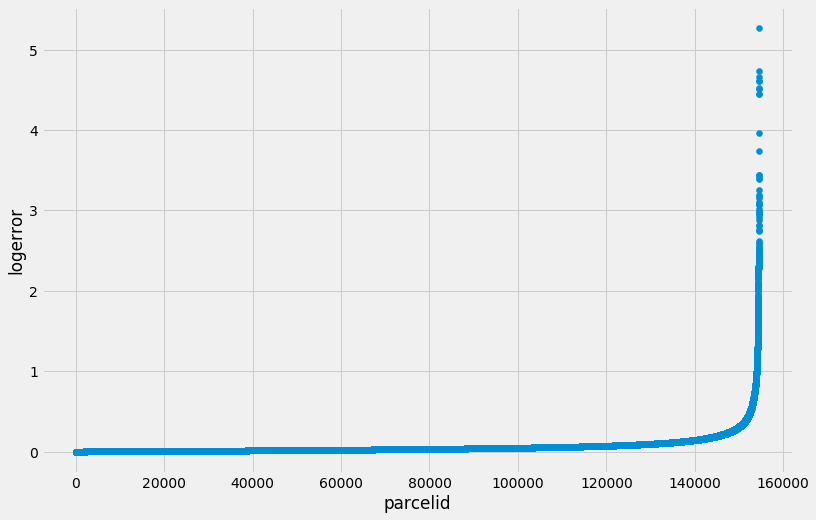

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


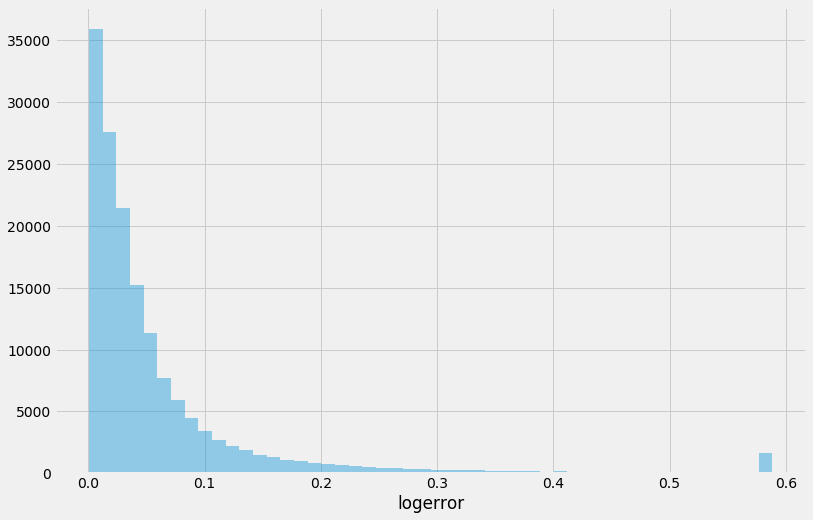

In [ ]:
# Plot the log error
plt.figure(figsize=(12,8))
plt.scatter(range(df.shape[0]), np.sort(df.logerror.values))
plt.xlabel('parcelid')
plt.ylabel('logerror')
plt.show()

# Remove outliers
ulimit = np.percentile(df.logerror.values, 99)
llimit = np.percentile(df.logerror.values, 1)
df['logerror'].loc[df['logerror']>ulimit] = ulimit
df['logerror'].loc[df['logerror']<llimit] = llimit

# Plot the distribution
plt.figure(figsize=(12,8))
sns.distplot(df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror')
plt.show()

In [ ]:
df.columns

Index(['logerror', 'transactiondate', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'regionidcounty', 'regionidzip', 'yearbuilt',
       'landtaxvaluedollarcnt', 'taxamount', 'propertylandusedesc',
       'heatingorsystemdesc'],
      dtype='object')

Let's create a variable to hold a list of numerical variables.

In [ ]:
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols

['logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'yearbuilt',
 'landtaxvaluedollarcnt',
 'taxamount']

Let's create a variable to hold a list of non-numerical variables.

In [ ]:
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
cat_cols

['transactiondate',
 'buildingqualitytypeid',
 'regionidcounty',
 'regionidzip',
 'propertylandusedesc',
 'heatingorsystemdesc']

Let's save a copy of the dataframe before standardizing.

In [ ]:
df_normal = df.copy()

Let's use minmax scaling to standardize applicable variables.

In [ ]:
df = dd.standardize_data(df, columns=['logerror',
                                      'bathroomcnt',
                                      'bedroomcnt',
                                      'calculatedbathnbr',
                                      'calculatedfinishedsquarefeet',
                                      'latitude',
                                      'longitude',
                                      'lotsizesquarefeet',
                                      'yearbuilt',
                                      'landtaxvaluedollarcnt',
                                      'taxamount'])

Let's see the distribution of some variables.

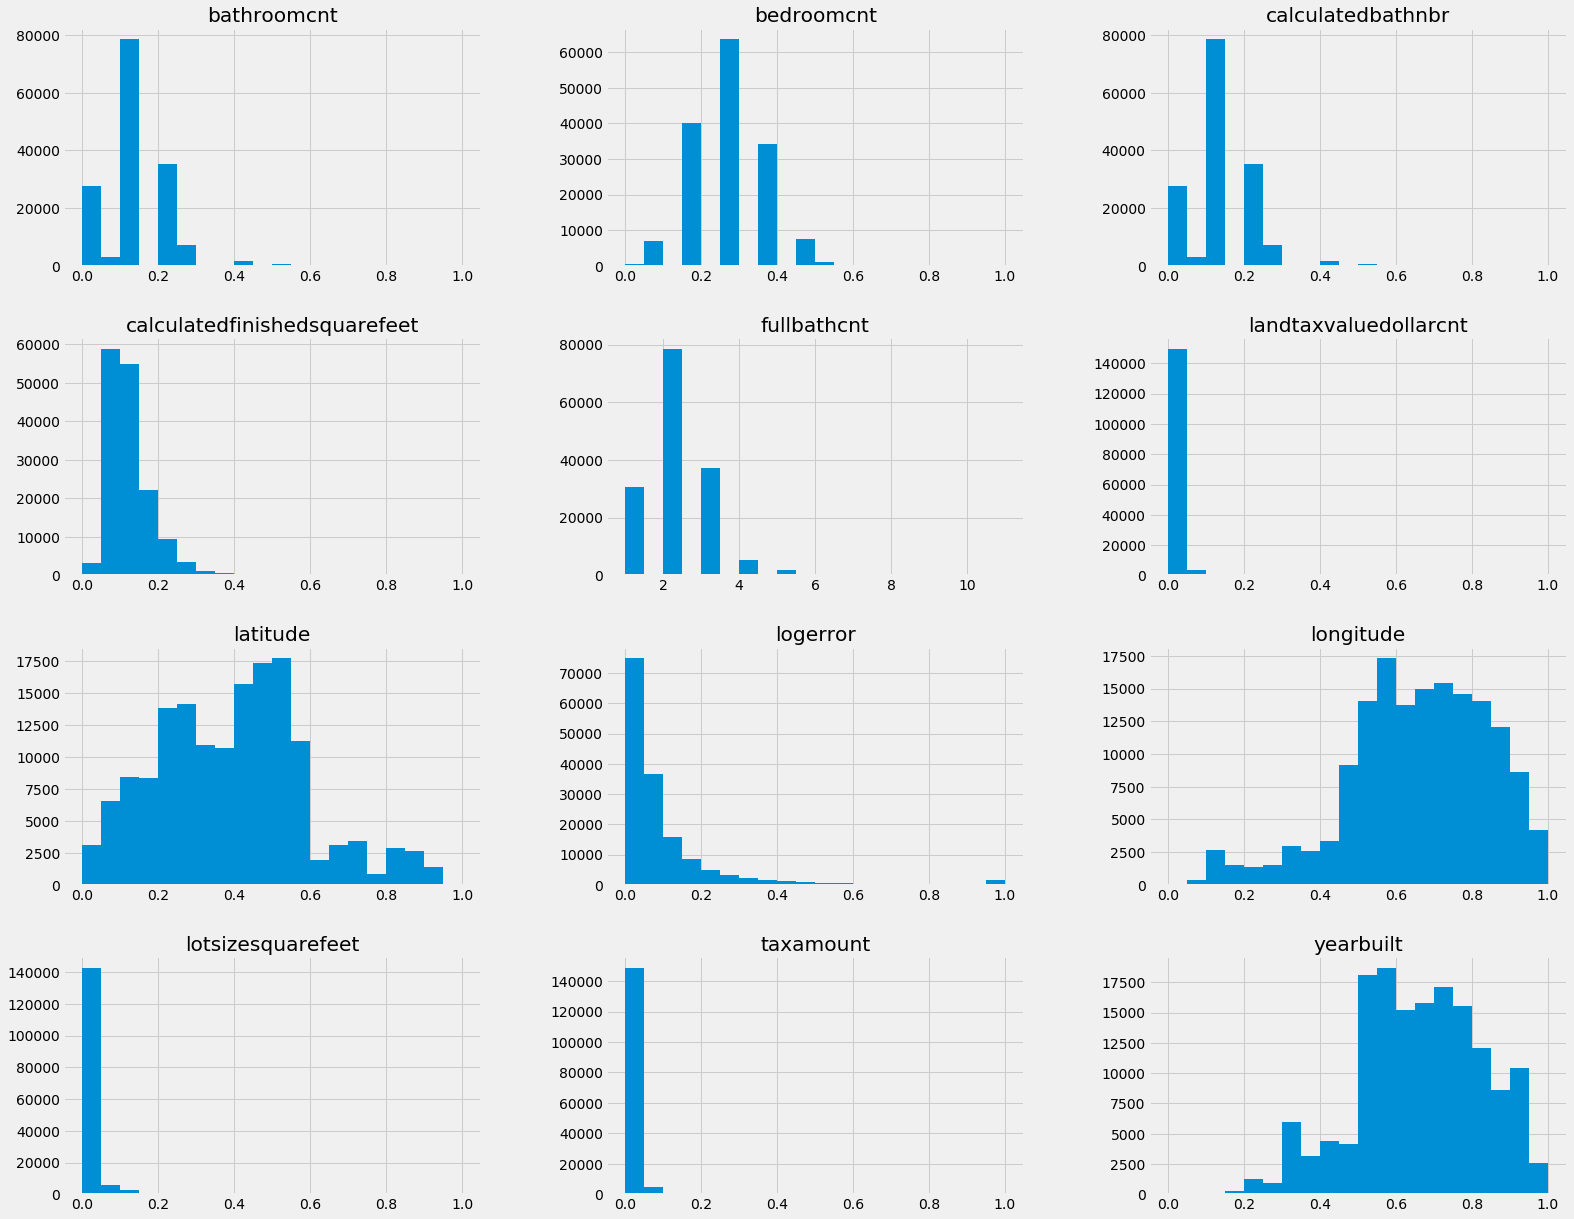

In [ ]:
dd.plot_hist(df)

Let's now generate a pairplot to see how our variables interact with each other.

In [ ]:
sns.pairplot(df, vars=num_cols)

And a heatmap to see the correlation of variables.

In [ ]:
df_heat = df[num_cols]
dd.plot_heat(df_heat)

Let's remove redundant variables some more.

In [ ]:
df = dd.remove_columns(df, cols_to_remove=['calculatedbathnbr',
                                           'fullbathcnt',
                                           'landtaxvaluedollarcnt'])
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols

Let's concentrate on single-unit dwellings...

In [ ]:
df.propertylandusedesc.value_counts()

and narrow them down accordingly:

In [ ]:
df = df.loc[(df['propertylandusedesc'] == 'Single Family Residential') |
                (df['propertylandusedesc'] == 'Condominium') |
                (df['propertylandusedesc'] == 'Residential General') |
                (df['propertylandusedesc'] == 'Townhouse')
               ]



In [ ]:
df.propertylandusedesc.value_counts()

In [ ]:
dd.summarize_data(df)

In [ ]:
dd.plot_rel(df, 'longitude', 'latitude', 'heatingorsystemdesc')

In [ ]:
dd.plot_rel(df, 'longitude', 'latitude', 'propertylandusedesc')

In [ ]:
num_cols

In [ ]:
df_xgb_x = df[num_cols].drop(columns=['logerror'])

In [ ]:
fn = df_xgb_x.columns.values

In [ ]:
xgb_params = {
    'max_depth': 8,
    'seed' : 493
}
dtrain = xgb.DMatrix(df_xgb_x, df.logerror, feature_names=fn)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

## Clustering

### Cluster 1 - logerror

In [ ]:
df_c1 = df[['logerror']]

In [ ]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_c1)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()

In [ ]:
estimators = [('2 Clusters', KMeans(n_clusters=2)),
              ('3 Clusters', KMeans(n_clusters=3))]

for i, (title, kmeans) in enumerate(estimators):
    # fit the kmeans object
    kmeans.fit(df_c1)

    fig = plt.figure(i + 1, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    labels = kmeans.labels_

    ax.scatter(df.taxamount, 
               df.logerror,
               df.calculatedfinishedsquarefeet,
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Tax Amount')
    ax.set_ylabel('Log Error')
    ax.set_zlabel('Finished Sqft')
    ax.set_title(title)
    ax.dist = 12

In [ ]:
plt.subplots(nrows=1,ncols=2, figsize=(12,6))
for i, (title, kmeans) in enumerate(estimators):
    kmeans.fit(df_c1)
    labels = kmeans.labels_
    plot_number = i + 1 # i starts at 0, but plot numbers should start at 1
    plt.subplot(1, 2, plot_number)
    plt.title(title)
    sns.scatterplot(df.calculatedfinishedsquarefeet, df.logerror, hue=labels)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_c1)
df['cluster_target_a'] = kmeans.predict(df_c1)
df.cluster_target_a = (df.cluster_target_a + 1)
sns.relplot(data=df, x='calculatedfinishedsquarefeet', y='logerror', hue='cluster_target_a')

In [ ]:
df.cluster_target_a.value_counts()

In [ ]:
kmeans.cluster_centers_

In [ ]:
df.head()

## Cluster 2 - calculatedfinishedsquarefeet

In [ ]:
df_c2 = df[['calculatedfinishedsquarefeet']]

In [ ]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_c2)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()

In [ ]:
estimators = [('2 Clusters', KMeans(n_clusters=2)),
              ('3 Clusters', KMeans(n_clusters=3))]

for i, (title, kmeans) in enumerate(estimators):
    # fit the kmeans object
    kmeans.fit(df_c2)

    fig = plt.figure(i + 1, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    labels = kmeans.labels_

    ax.scatter(df.taxamount, 
               df.logerror,
               df.calculatedfinishedsquarefeet,
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Tax Amount')
    ax.set_ylabel('Log Error')
    ax.set_zlabel('Finished Sqft')
    ax.set_title(title)
    ax.dist = 12

In [ ]:
plt.subplots(nrows=1,ncols=2, figsize=(12,6))
for i, (title, kmeans) in enumerate(estimators):
    kmeans.fit(df_c2)
    labels = kmeans.labels_
    plot_number = i + 1 # i starts at 0, but plot numbers should start at 1
    plt.subplot(1, 2, plot_number)
    plt.title(title)
    sns.scatterplot(df.calculatedfinishedsquarefeet, df.logerror, hue=labels)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_c2)
df['cluster_target_b'] = kmeans.predict(df_c2)
df.cluster_target_b = (df.cluster_target_b + 1)
sns.relplot(data=df, x='calculatedfinishedsquarefeet', y='logerror', hue='cluster_target_b')


In [ ]:
kmeans.cluster_centers_

In [ ]:
df.head()

### Cluster 3 - lotsizesquarefeet

In [ ]:
df_c3 = df[['lotsizesquarefeet']]

In [ ]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_c3)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()

In [ ]:
estimators = [('2 Clusters', KMeans(n_clusters=2)),
              ('3 Clusters', KMeans(n_clusters=3)),
              ('4 Clusters', KMeans(n_clusters=4))]

for i, (title, kmeans) in enumerate(estimators):
    # fit the kmeans object
    kmeans.fit(df_c3)

    fig = plt.figure(i + 1, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    labels = kmeans.labels_

    ax.scatter(df.lotsizesquarefeet, 
               df.logerror,
               df.calculatedfinishedsquarefeet,
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Lot Size Sqft')
    ax.set_ylabel('Log Error')
    ax.set_zlabel('Finished Sqft')
    ax.set_title(title)
    ax.dist = 12

In [ ]:
plt.subplots(nrows=1,ncols=2, figsize=(12,12))
for i, (title, kmeans) in enumerate(estimators):
    kmeans.fit(df_c3)
    labels = kmeans.labels_
    plot_number = i + 1 # i starts at 0, but plot numbers should start at 1
    plt.subplot(2, 2, plot_number)
    plt.title(title)
    sns.scatterplot(df.lotsizesquarefeet, df.logerror, hue=labels)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_c3)
df['cluster_target_c'] = kmeans.predict(df_c3)
df.cluster_target_c = (df.cluster_target_c + 1)
sns.relplot(data=df, x='lotsizesquarefeet', y='logerror', hue='cluster_target_c')


In [ ]:
kmeans.cluster_centers_

In [ ]:
df.head()

### Test the Significance of Clusters

In [ ]:
df.info()

In [ ]:
ct_j = df[df['cluster_target_b'] == 1]
ct_k = df[df['cluster_target_b'] == 2]

stat, p = stats.ttest_ind(ct_j['logerror'], ct_k['logerror'])
print(f'T-stat: {stat}')
print(f'p-value: {p}')

In [ ]:
ct_j = df[df['cluster_target_b'] == 2]
ct_k = df[df['cluster_target_b'] == 3]

stat, p = stats.ttest_ind(ct_j['logerror'], ct_k['logerror'])
print(f'T-stat: {stat}')
print(f'p-value: {p}')

In [ ]:
ct_j = df[df['cluster_target_c'] == 1]
ct_k = df[df['cluster_target_c'] == 2]

stat, p = stats.ttest_ind(ct_j['logerror'], ct_k['logerror'])
print(f'T-stat: {stat}')
print(f'p-value: {p}')

In [ ]:
ct_j = df[df['cluster_target_c'] == 2]
ct_k = df[df['cluster_target_c'] == 3]

stat, p = stats.ttest_ind(ct_j['logerror'], ct_k['logerror'])
print(f'T-stat: {stat}')
print(f'p-value: {p}')

In [ ]:
df.info()

In [ ]:
df_normal.sample(100)

In [ ]:
df_normal.bathroomcnt.value_counts()

In [ ]:
data_bath_3 = df_normal[df_normal['bathroomcnt'] <= 3.0]
data_bath_4 = df_normal[df_normal['bathroomcnt'] >= 4.0]

stat, p = stats.ttest_ind(data_bath_3['logerror'], data_bath_3['logerror'])
print(f'T-stat: {stat}')
print(f'p-value: {p}')

In [ ]:
data_bed_3 = df_normal[df_normal['bedroomcnt'] == 3.0]
data_bed_5 = df_normal[df_normal['bedroomcnt'] >= 5.0]

stat, p = stats.ttest_ind(data_bed_3['logerror'], data_bed_5['logerror'])
print(f'T-stat: {stat}')
print(f'p-value: {p}')

# if p-value is < 0.05, you can reject the null hypothesis

# Modeling

## Feature Engineering

### Remove variables that are not needed, wanted, or redundant.

In [ ]:
df.info()

In [ ]:
df = dd.remove_columns(df, cols_to_remove=['transactiondate'])

### Add any features you think may be useful.

In [ ]:
df_bbroom = df
df_bbroom['bbroom'] = df.bathroomcnt + df.bedroomcnt
df_bbroom.drop(columns=['bathroomcnt', 'bedroomcnt'])

In [ ]:
df.head()

In [ ]:
df.regionidzip = df.regionidzip.astype(float)

In [ ]:
# Copy of the dataframe before taking the absolute value of log errors.
df_nabs = df.copy()

In [ ]:
# Take the absolute value of log errors
df.logerror = df.logerror.abs()
df.logerror.sample(10)

### Train and Test Split

In [ ]:
# train_test_split
X = df.drop(['logerror'], axis=1)

print(X.head())

y = df[['logerror']]
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=493)

train = pd.concat([X_train, y_train], axis=1)

print()
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print()

test = pd.concat([X_test, y_test], axis=1)

print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)
print()

X.sample(10)

In [ ]:
dd.validate_tts(X_train, y_train, X_test, y_test, train, test)

## Model Selection

In [ ]:
lm1, r2_lm1 = dd.model_linreg(X_train, y_train, features=['calculatedfinishedsquarefeet'])

In [ ]:
lm2, r2_lm2 = dd.model_linreg(X_train, y_train, features=['taxamount'])

In [ ]:
lm3, r2_lm3 = dd.model_linreg(X_train, y_train, features=['calculatedfinishedsquarefeet', 'taxamount', 'yearbuilt'])

In [ ]:
lm4, r2_lm4 = dd.model_linreg(X_train, y_train, features=['calculatedfinishedsquarefeet', 'taxamount', 'latitude', 'longitude', 'lotsizesquarefeet'])

In [ ]:
lm5, r2_lm5 = dd.model_linreg(X_train, y_train, features=['cluster_target_a', 'cluster_target_b', 'cluster_target_c'])

In [ ]:
lm6, r2_lm6 = dd.model_linreg(X_train, y_train, features=['cluster_target_a', 'cluster_target_b'])

In [ ]:
lm7, r2_lm7 = dd.model_linreg(X_train, y_train, features=['cluster_target_c'])

In [ ]:
# Make predictions using the testing set
y_pred_lm5 = lm5.predict(X_test[['cluster_target_a', 'cluster_target_b', 'cluster_target_c']])
mse = mean_squared_error(y_test, y_pred_lm5)
print(f'Mean Squared Error: {mse}')

In [ ]:
r2 = r2_score(y_test, y_pred_lm5)
print('{:.2%} of the variance in log errors can be explained by cluster targets a, b, and c.'.format(r2))

In [ ]:
plt.scatter(y_pred_lm5, y_pred_lm5 - y_test, c='r', s=40)
plt.hlines(y=0, xmin=0, xmax=.8)
plt.title("Residual Plot")
plt.ylabel('Residuals')